# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import numpy.random as rand
from matplotlib import pyplot as plt
import datetime as DT
import yfinance as yf
import seaborn as sns
sns.set_style('darkgrid')
import json

In [2]:
import logging
logger = logging.getLogger('yfinance')
logger.disabled = True
logger.propagate = False

# Import Nasdaq tickers

In [3]:
absolute_path_to_tickers = '/home/travis/Documents/Reseach/Quant_Prep/Stock_Utilities'
nasdaq_json = absolute_path_to_tickers+'/Nasdaq.json'

with open(nasdaq_json, 'r') as data_file:
    nasdaq_data = data_file.read()

nasdaq_tickers = np.array(json.loads(nasdaq_data))

# Implement Ticker Sampler

## Can we obtain normally distributed returns by picking *random* stocks?

In [4]:
def Sample_Nasdaq_Tickers(start_time, end_time, N, verbose=True):
    total_num_of_tickers = len(nasdaq_tickers)
    random_indices = list(range(total_num_of_tickers))
    rand.shuffle(random_indices)
    
    local_tickers = nasdaq_tickers.copy()
    tickers = [local_tickers[random_indices.pop()]['Symbol'] for i in range(N)]
    
    data = yf.download(tickers, start=start_time, end=end_time);
    closed_data = data['Close'].dropna(axis=1)
    
    good_samples = len(closed_data.columns)
    while good_samples < N:
        resamples = N - good_samples
        if verbose: print(resamples," sample(s) failed. Retrying..")
        new_tickers = [local_tickers[random_indices.pop()]['Symbol'] for i in range(resamples)]
        data = yf.download(new_tickers, start=start_time, end=end_time)
        new_closed_data = data['Close'].dropna(axis=1)
        closed_data = closed_data.join(new_closed_data)
        good_samples = len(closed_data.columns)
    
    if verbose: print("Done.") 
    return closed_data

### Pick N securities and D days ago

In [5]:
N = 100
D = 365

## One year ago until today:

In [6]:
start = DT.datetime.today() -  DT.timedelta(days = D)
end = DT.datetime.today()

securities = Sample_Nasdaq_Tickers(start,end,N)
log_returns = np.log(securities/securities.shift(1))

conglomerate_log_returns = log_returns.dropna().mean(axis=1)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  100 of 100 completed
[                       0%                       ]

26  sample(s) failed. Retrying..


[*********************100%***********************]  26 of 26 completed
[                       0%                       ]

3  sample(s) failed. Retrying..


[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


1  sample(s) failed. Retrying..
Done.


In [7]:
total_log_returns = round(np.sum(conglomerate_log_returns),6)
print("Total log returns: ", total_log_returns)

Total log returns:  -0.111809


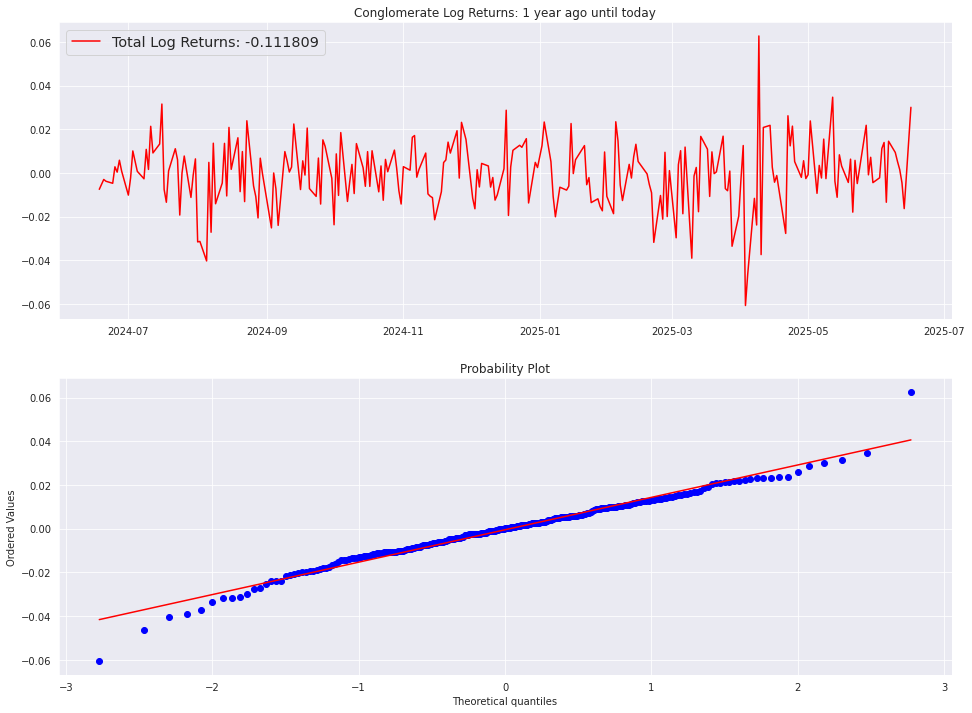

Conglomerate Log Returns, p-value:  0.0002668047796788549


In [8]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(16,12))
c = "g" if total_log_returns > 0 else "r" if total_log_returns < 0 else "k"

ax1.plot(conglomerate_log_returns,color=c,label='Total Log Returns: {:.6f}'.format(total_log_returns))
ax1.legend(fontsize='x-large')
ax1.set_title("Conglomerate Log Returns: 1 year ago until today")
stats.probplot(conglomerate_log_returns,plot=ax2)
plt.show()
print("Conglomerate Log Returns, p-value: ",stats.normaltest(conglomerate_log_returns)[1])

## Doesn't really work no matter how many you run..

# Now do the same.. but start 2 years ago and ending 1 year ago (we are in tumultuous times..)

In [63]:
# Starting two years ago, ending a year ago
start = DT.datetime.today() -  DT.timedelta(days = 2*D)
end = DT.datetime.today() -  DT.timedelta(days = D)


securities = Sample_Nasdaq_Tickers(start,end,N)
log_returns = np.log(securities/securities.shift(1))
conglomerate_log_returns = log_returns.dropna().mean(axis=1)

[*********************100%***********************]  200 of 200 completed
[                       0%                       ]

46  sample(s) failed. Retrying..


[*********************100%***********************]  46 of 46 completed
[*******               14%                       ]  2 of 14 completed

14  sample(s) failed. Retrying..


[*********************100%***********************]  14 of 14 completed
[**********************67%*******                ]  2 of 3 completed

3  sample(s) failed. Retrying..


[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  2 of 2 completed


2  sample(s) failed. Retrying..
Done.


In [64]:
total_log_returns = round(np.sum(conglomerate_log_returns),6)
print("Total log returns: ", total_log_returns)

Total log returns:  -0.287608


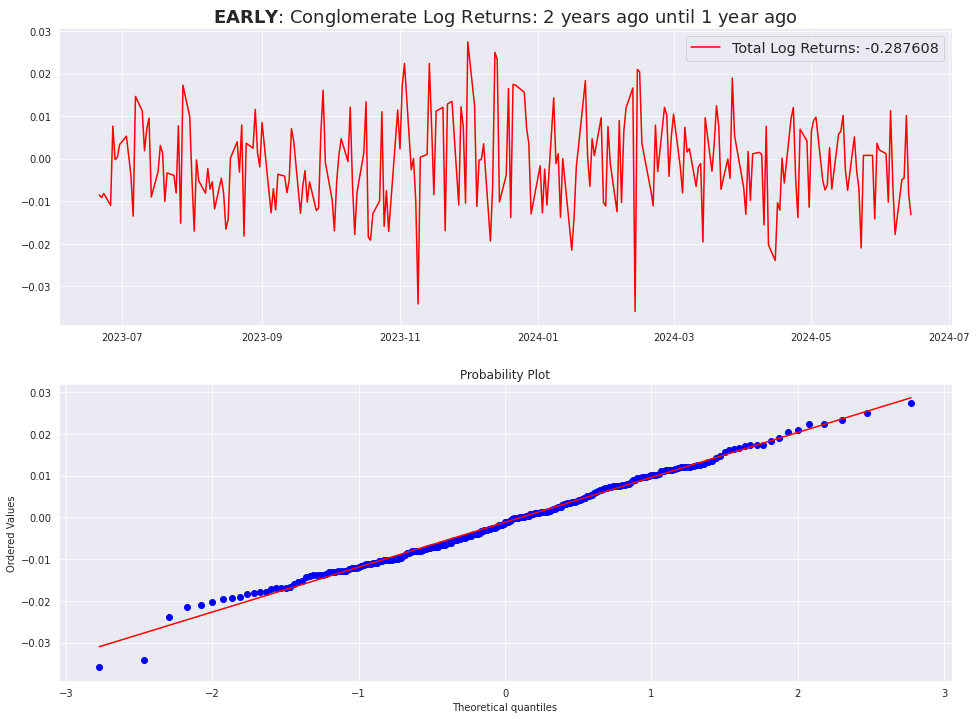

Conglomerate Log Returns, p-value:  0.9716661069480044


In [65]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(16,12))
c = "g" if total_log_returns > 0 else "r" if total_log_returns < 0 else "k"

ax1.plot(conglomerate_log_returns,color=c,label='Total Log Returns: {:.6f}'.format(total_log_returns))
ax1.legend(fontsize='x-large')
ax1.set_title(r"$\bf{EARLY}$" + ": Conglomerate Log Returns: 2 years ago until 1 year ago",size=18)
stats.probplot(conglomerate_log_returns,plot=ax2)
plt.show()
print("Conglomerate Log Returns, p-value: ",stats.normaltest(conglomerate_log_returns)[1])

## Seems the timing makes a huge difference! In this case, it is sometimes possible to sometimes find normally distributed log returns. Would be interesting in the future to see the distributions of N normally distributed securites , e.g. how many N securities before we should have a better than 1/2 chance of finding normally distributed returns?


## What if we pick the top by trading volume?

### Let's download all the tickers, go back a year, sort by volume, and pick the first X securites

### !! Caution: Heavy Line Below !!

In [18]:
tickers = [nasdaq_tickers[i]['Symbol'] for i in range(len(nasdaq_tickers))]
start = DT.datetime.today() -  DT.timedelta(days = 365)
end = DT.datetime.today()


ALL_ASSETS = yf.download(tickers, start=start, end=end)

[*********************100%***********************]  4902 of 4902 completed


### !! Caution: Heavy Line Above !!

In [19]:
NA_dropped = ALL_ASSETS.drop(ALL_ASSETS.tail(1).index).dropna(axis=1)

In [20]:
%reset_selective ALL_ASSETS

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [21]:
mean_volume = NA_dropped['Volume'].mean()
sorted_tickers = mean_volume.sort_values(ascending=False).index

log_returns = np.log(NA_dropped['Close'] / NA_dropped['Close'].shift(1))

## Take the first N in volume

In [22]:
N = 200
sorted_log_returns = log_returns[sorted_tickers[0:N]]

In [23]:
conglomerate_log_returns = sorted_log_returns.dropna().mean(axis=1)
total_log_returns = round(np.sum(conglomerate_log_returns),6)
print("Total log returns: ", total_log_returns)

Total log returns:  -0.163391


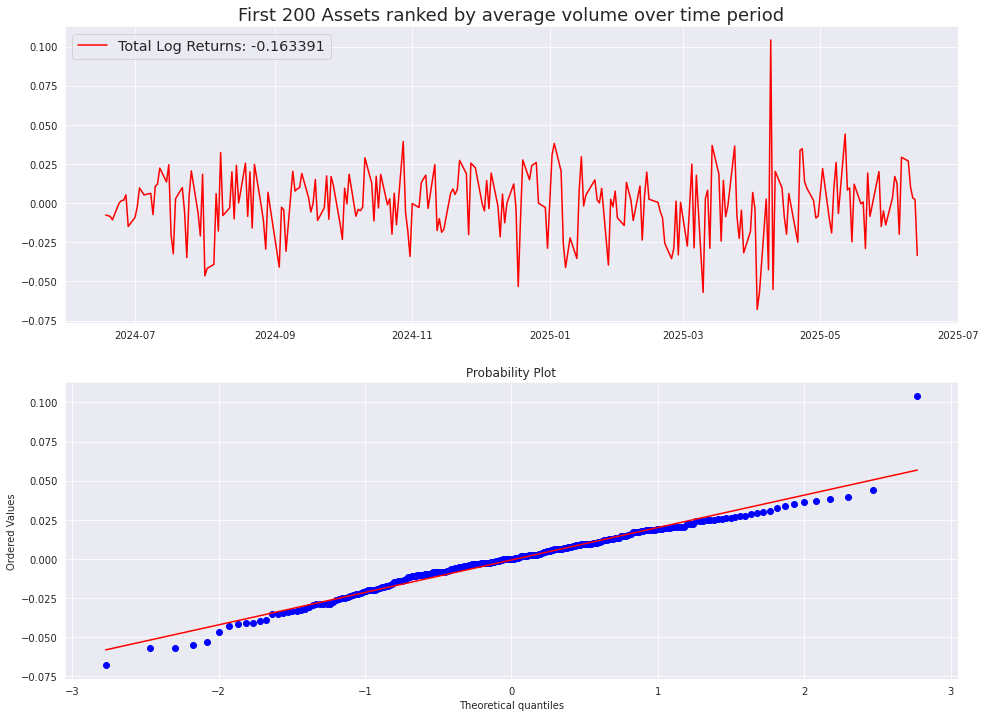

Conglomerate Log Returns, p-value:  0.0001860991653893488


In [24]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(16,12))
c = "g" if total_log_returns > 0 else "r" if total_log_returns < 0 else "k"

ax1.plot(conglomerate_log_returns,color=c,label='Total Log Returns: {:.6f}'.format(total_log_returns))
ax1.legend(fontsize='x-large')
ax1.set_title('First {} Assets ranked by average volume over time period'.format(N),size=18)
stats.probplot(conglomerate_log_returns,plot=ax2)
plt.show()
print("Conglomerate Log Returns, p-value: ",stats.normaltest(conglomerate_log_returns)[1])

# Again! But this time again going back further and ending earlier, as before

### !! Caution: Heavy Line Below !!

In [25]:
tickers = [nasdaq_tickers[i]['Symbol'] for i in range(len(nasdaq_tickers))]
start = DT.datetime.today() -  DT.timedelta(days = 2*365)
end = DT.datetime.today() -  DT.timedelta(days = 365)


ALL_ASSETS = yf.download(tickers, start=start, end=end)

[*********************100%***********************]  4902 of 4902 completed


### !! Caution: Heavy Line Above !!

In [26]:
NA_dropped_earlier = ALL_ASSETS.drop(ALL_ASSETS.tail(1).index).dropna(axis=1)

In [27]:
%reset_selective ALL_ASSETS

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [55]:
mean_volume = NA_dropped_earlier['Volume'].mean()
sorted_tickers = mean_volume.sort_values(ascending=False).index

log_returns = np.log(NA_dropped_earlier['Close'] / NA_dropped_earlier['Close'].shift(1))

/home/travis/.local/lib/python3.8/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


## Take the first N in volume

In [56]:
N = 200
sorted_log_returns_earlier = log_returns[sorted_tickers[0:N]]

In [57]:
conglomerate_log_returns = sorted_log_returns_earlier.dropna().mean(axis=1)
total_log_returns = round(np.sum(conglomerate_log_returns),6)
print("Total log returns: ", total_log_returns)

Total log returns:  0.024625


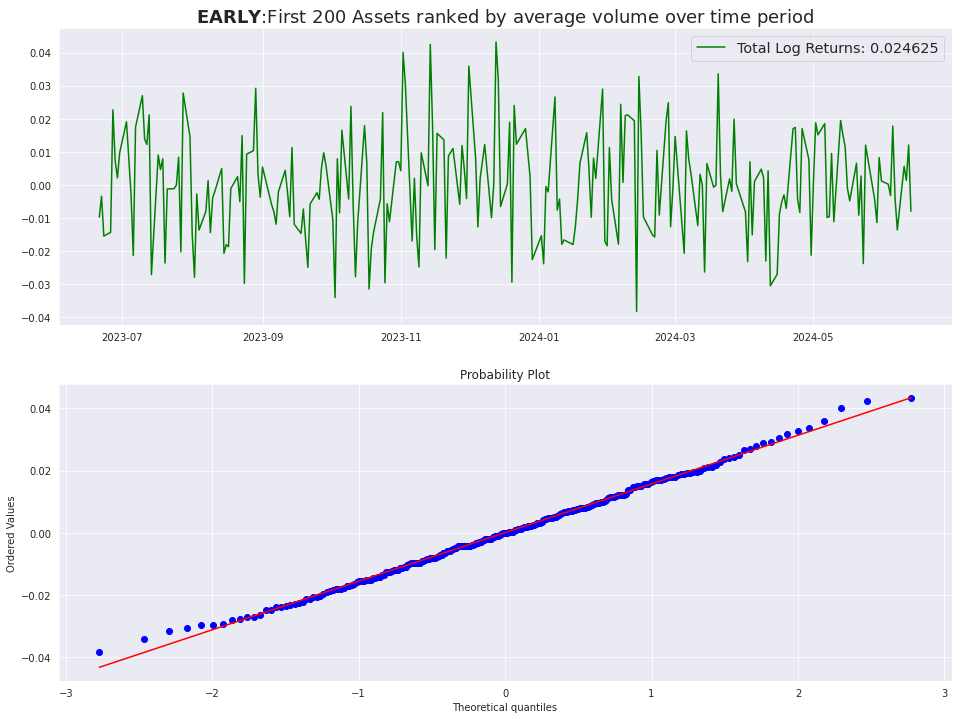

Conglomerate Log Returns, p-value:  0.5266649884888561


In [58]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(16,12))
c = "g" if total_log_returns > 0 else "r" if total_log_returns < 0 else "k"

ax1.plot(conglomerate_log_returns,color=c,label='Total Log Returns: {:.6f}'.format(total_log_returns))
ax1.legend(fontsize='x-large')
ax1.set_title(r"$\bf{EARLY}$" + ":First {} Assets ranked by average volume over time period".format(N),size=18)
stats.probplot(conglomerate_log_returns,plot=ax2)
plt.show()
print("Conglomerate Log Returns, p-value: ",stats.normaltest(conglomerate_log_returns)[1])

# Last try to get something close to normal for most recent period:   
## First sort by largest volume, then sort by least volatility

In [32]:
M = N//2

In [33]:
volatility = sorted_log_returns.dropna().std()
tickers_by_volatility = volatility.sort_values().index
sorted_volatility_LgRet = sorted_log_returns.dropna()[tickers_by_volatility[0:M]]

In [34]:
conglomerate_log_returns = sorted_volatility_LgRet.mean(axis=1)
total_log_returns = round(np.sum(conglomerate_log_returns),6)
print("Total log returns: ", total_log_returns)

Total log returns:  -0.004098


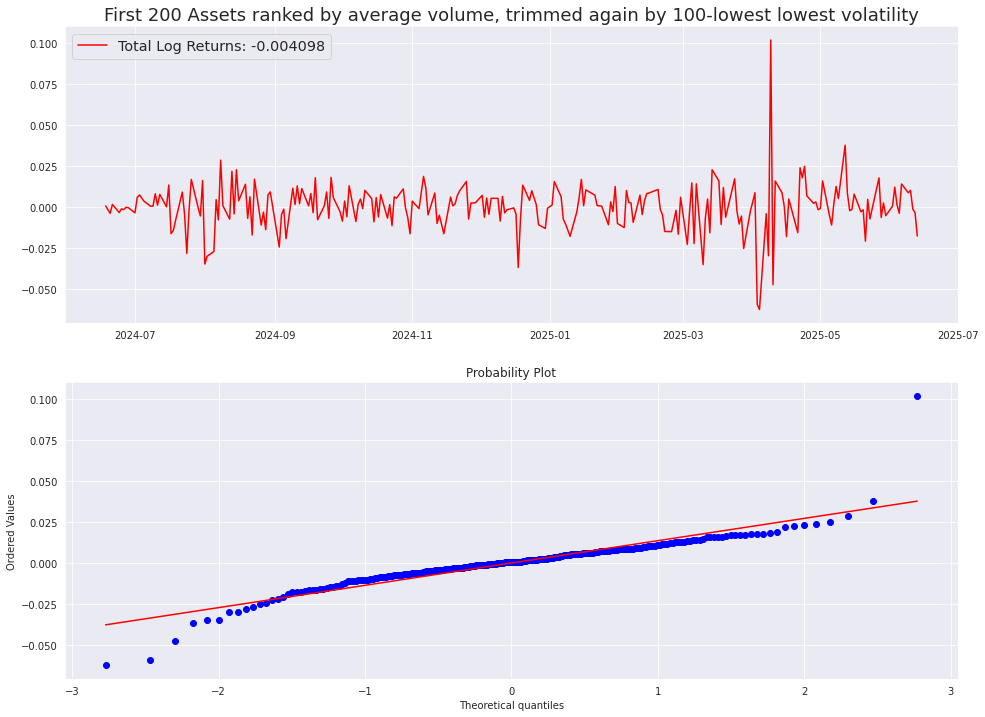

Conglomerate Log Returns, p-value:  5.936028534308707e-16


In [35]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(16,12))
c = "g" if total_log_returns > 0 else "r" if total_log_returns < 0 else "k"

ax1.plot(conglomerate_log_returns,color=c,label='Total Log Returns: {:.6f}'.format(total_log_returns))
ax1.legend(fontsize='x-large')
ax1.set_title('First {} Assets ranked by average volume, trimmed again by {}-lowest lowest volatility'.format(N,M),size=18)
stats.probplot(conglomerate_log_returns,plot=ax2)
plt.show()
print("Conglomerate Log Returns, p-value: ",stats.normaltest(conglomerate_log_returns)[1])

# Indeed, recent times are *quite* tumultuous

## For fun, let's see how well sorting by volatility does for earlier time set

In [36]:
M = N//2

In [37]:
volatility = sorted_log_returns_earlier.dropna().std()
tickers_by_volatility = volatility.sort_values().index
sorted_volatility_LgRet = sorted_log_returns_earlier.dropna()[tickers_by_volatility[0:M]]

In [38]:
conglomerate_log_returns = sorted_volatility_LgRet.mean(axis=1)
total_log_returns = round(np.sum(conglomerate_log_returns),6)
print("Total log returns: ", total_log_returns)

Total log returns:  0.125674


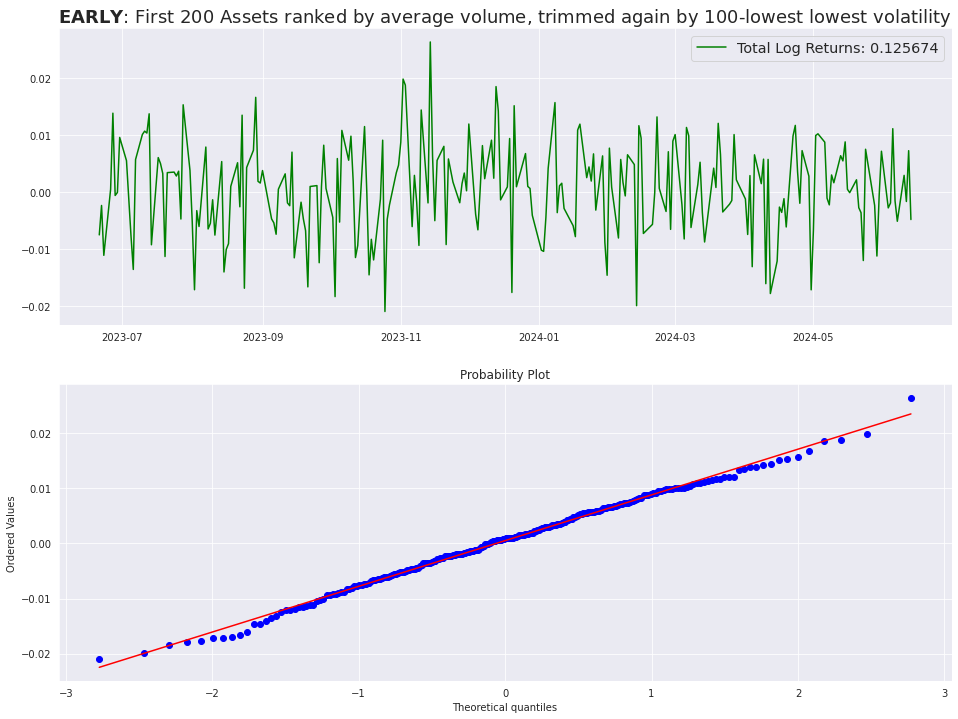

Conglomerate Log Returns, p-value:  0.7814724555961287


In [52]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(16,12))
c = "g" if total_log_returns > 0 else "r" if total_log_returns < 0 else "k"

ax1.plot(conglomerate_log_returns,color=c,label='Total Log Returns: {:.6f}'.format(total_log_returns))
ax1.legend(fontsize='x-large')
ax1.set_title(r"$\bf{EARLY}$" + ": First {} Assets ranked by average volume, trimmed again by {}-lowest lowest volatility".format(N,M),size=18)
stats.probplot(conglomerate_log_returns,plot=ax2)
plt.show()
print("Conglomerate Log Returns, p-value: ",stats.normaltest(conglomerate_log_returns)[1])

# Decent returns, too!